<a href="https://colab.research.google.com/github/Claudia-Rocha-H/Claudia-Rocha-H/blob/main/MetodosOptimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega de métodos vistos en clase**

*Claudia María Rocha Hernández - 1143463302*


*Optimización - Grupo 01*

---

### Índice

1. Método de bisección
2. Método de falsa posición
3. Método de la Razón dorada
4. Interpolación cuadrática
5. Método de Newton
6. Método de Newton-Raphson
7. Búsqueda aleatoria



---



# **1. Metodo de Bisección**

Iter  xl        xr        xu        f(xl)          f(xr)          Error          
--------------------------------------------------------------------------------
1     35.000000 40.000000 40.000000 -425.000000    100.000000     5.000000       
2     37.500000 37.500000 40.000000 -425.000000    -181.250000    2.500000       
3     38.750000 38.750000 40.000000 -181.250000    -45.312500     1.250000       
4     38.750000 39.375000 39.375000 -45.312500     26.171875      0.625000       
5     39.062500 39.062500 39.375000 -45.312500     -9.863281      0.312500       
6     39.062500 39.218750 39.218750 -9.863281      8.081055       0.156250       
7     39.140625 39.140625 39.218750 -9.863281      -0.909424      0.078125       
8     39.140625 39.179688 39.179688 -0.909424      3.581238       0.039062       
9     39.140625 39.160156 39.160156 -0.909424      1.334763       0.019531       
10    39.140625 39.150391 39.150391 -0.909424      0.212383       0.009766       
11    39.145508 3

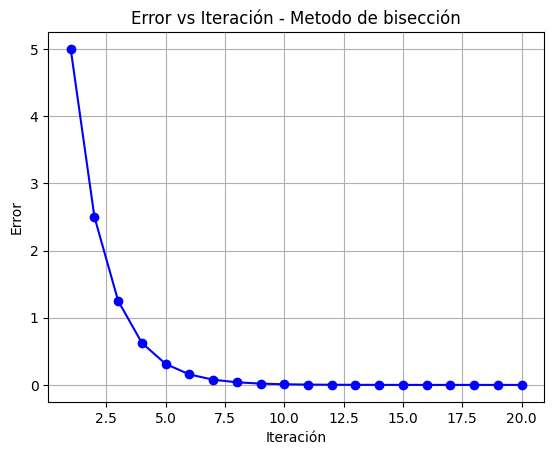

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fx = lambda x: 3*x**2 - 120*x + 100

xl = 35
xu = 45
tolerancia = 0.00001
error = 1

if fx(xl) * fx(xu) > 0:
    print("Elija otro intervalo, este no contiene a la raíz")
    exit()
else:
    lista_xr = []
    lista_error = []

    print(f"{'Iter':<6}{'xl':<10}{'xr':<10}{'xu':<10}{'f(xl)':<15}{'f(xr)':<15}{'Error':<15}")
    print("-" * 80)

    iteracion = 0
    while error > tolerancia:
        iteracion += 1
        xr = (xl + xu) / 2
        fxl = fx(xl)
        fxr = fx(xr)

        lista_xr.append(xr)

        if fxl * fxr < 0:
            xu = xr
        elif fxl * fxr > 0:
            xl = xr
        else:
            print("Raíz exacta encontrada en:", xr)
            break

        error = abs(xu - xl)
        lista_error.append(error)
        print(f"{iteracion:<6}{xl:<10.6f}{xr:<10.6f}{xu:<10.6f}{fxl:<15.6f}{fxr:<15.6f}{error:<15.6f}")

    print("-" * 80)
    print(f"La raíz aproximada es: {xr}")
    print(f"Error final: {error}")

    plt.plot(range(1, len(lista_error) + 1), lista_error, marker='o', color='b')
    plt.title("Error vs Iteración - Metodo de bisección")
    plt.xlabel("Iteración")
    plt.ylabel("Error")
    plt.grid(True)
    plt.show()


# **2. Método falsa posición**

 Iteración        xl  xu        xr       f(xl)      f(xr)    Error
         1 35.000000  45 38.541667 -425.000000 -68.619792 1.000000
         2 38.541667  45 39.066986  -68.619792  -9.350175 0.525319
         3 39.066986  45 39.137713   -9.350175  -1.243866 0.070727
         4 39.137713  45 39.147106   -1.243866  -0.164943 0.009394
         5 39.147106  45 39.148352   -0.164943  -0.021863 0.001245
         6 39.148352  45 39.148517   -0.021863  -0.002898 0.000165
         7 39.148517  45 39.148539   -0.002898  -0.000384 0.000022
         8 39.148539  45 39.148542   -0.000384  -0.000051 0.000003
--------------------------------------------------------------------------------
La raíz aproximada es: 39.14854171205839
Error final: 2.8998287149306634e-06


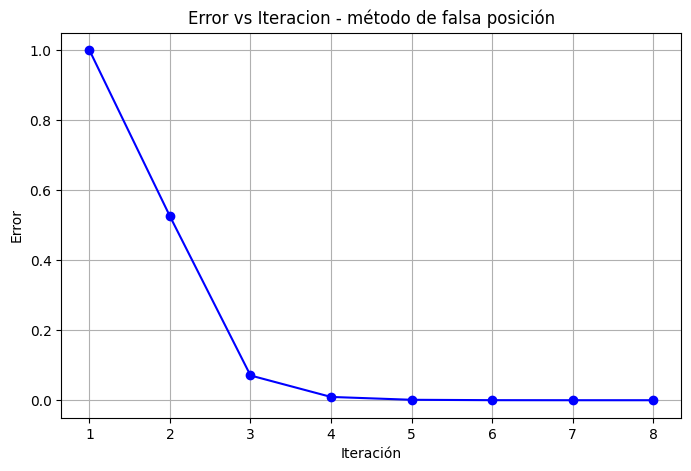

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fx = lambda x: 3*x**2 - 120*x + 100

xl = 35
xu = 45
tolerancia = 0.00001
error = 1
iteracion = 0

if fx(xl) * fx(xu) > 0:
    print("Elija otro intervalo, este no contiene a la raíz")
else:
  tabla = []
  errores = []

  while error > tolerancia:
      iteracion += 1
      fxl = fx(xl)
      fxu = fx(xu)

      xr = xu - (fxu * (xl - xu)) / (fxl - fxu)
      fxr = fx(xr)

      if iteracion > 1:
          error = abs(xr - tabla[-1][3])
      else:
          error = 1

      errores.append(error)

      tabla.append([iteracion, xl, xu, xr, fxl, fxr, error])

      if fxl * fxr < 0:
          xu = xr
      elif fxr * fxu < 0:
          xl = xr
      else:
          break
  df = pd.DataFrame(tabla, columns=["Iteración", "xl", "xu", "xr", "f(xl)", "f(xr)", "Error"])
  print(df.to_string(index=False))
  print("-" * 80)
  print(f"La raíz aproximada es: {xr}")
  print(f"Error final: {error}")
  plt.figure(figsize=(8,5))
  plt.plot(range(1, len(errores) + 1), errores, marker='o', linestyle='-', color='b')
  plt.xlabel("Iteración")
  plt.ylabel("Error")
  plt.title("Error vs Iteracion - método de falsa posición")
  plt.grid(True)
  plt.show()




# **3. Método sección dorada**

 Iteración       xl       xu        d       x1       x2    f(x1)    f(x2)    Error
         0 0.000000 4.000000 2.472000 2.472000 1.528000 1.775726 1.771431 0.944000
         1 0.000000 2.472000 1.527696 1.528000 0.944304 0.630255 1.764690 0.583696
         2 0.944304 2.472000 0.944116 1.888420 1.528000 1.764690 1.531007 0.360420
         3 0.944304 1.888420 0.583464 1.528000 1.304956 1.543347 1.764690 0.223044
         4 1.304956 1.888420 0.360581 1.665537 1.528000 1.764690 1.759453 0.137537
         5 1.304956 1.665537 0.222839 1.528000 1.442698 1.713630 1.764690 0.085302
         6 1.304956 1.528000 0.137841 1.442698 1.390159 1.764690 1.775475 0.052539
         7 1.390159 1.528000 0.085186 1.475345 1.442698 1.775475 1.774205 0.032647
         8 1.390159 1.475345 0.052645 1.442698 1.422700 1.773232 1.775475 0.019998
         9 1.390159 1.442698 0.032469 1.422700 1.410229 1.775475 1.775700 0.012471
        10 1.410229 1.442698 0.020066 1.430295 1.422700 1.775700 1.775399 0.007595
    

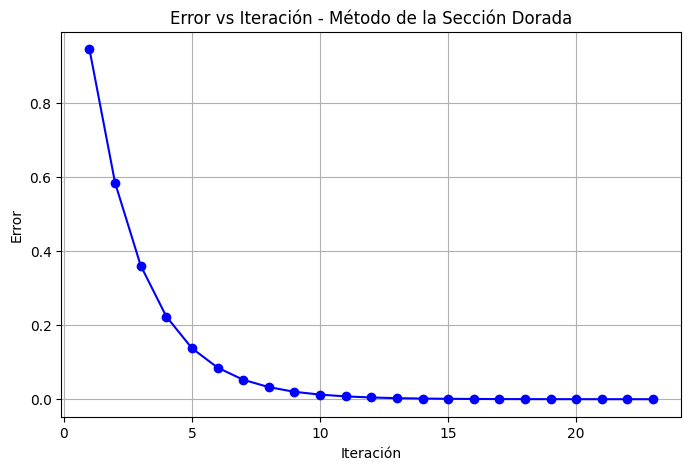

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fx = lambda x: 2 * np.sin(x) - (x**2 / 10)

xl = 0
xu = 4
tolerancia = 0.00001
error = 1
iteracion = 0
d = 0.618 * (xu - xl)
x1 = xl + d
x2 = xu - d
tabla = []
errores = []
error = abs(x1 - x2)
errores.append(error)
tabla.append([iteracion, xl, xu, d, x1, x2, fx1, fx2, error])
while error > tolerancia:
    iteracion += 1
    fx1 = fx(x1)
    fx2 = fx(x2)

    if fx2 > fx1:
        xu = x1
        x1 = x2
        d = 0.618 * (xu - xl)
        x2 = xu - d
    else:
        xl = x2
        x2 = x1
        d = 0.618 * (xu - xl)
        x1 = xl + d
    error = abs(x1 - x2)
    errores.append(error)
    tabla.append([iteracion, xl, xu, d, x1, x2, fx1, fx2, error])

df = pd.DataFrame(tabla, columns=["Iteración", "xl", "xu", "d", "x1", "x2", "f(x1)", "f(x2)", "Error"])
print(df.to_string(index=False))
print("-" * 100)
print(f"El máximo aproximado es: {fx2}")
print(f"Error final: {error}")
plt.figure(figsize=(8,5))
plt.plot(range(1, len(errores) + 1), errores, marker='o', linestyle='-', color='b')
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.title("Error vs Iteración - Método de la Sección Dorada")
plt.grid(True)
plt.show()

# **4. Método interpolación cuadrática**

 Iteración       x0    f(x0)       x1    f(x1)       x2     f(x2)       x3    f(x3)    Error
         1 1.000000 0.000000 1.505535 1.582942 4.000000 -3.113605 1.505535 1.769079 0.505535
         2 1.000000 1.582942 1.490253 1.769079 1.505535 -3.113605 1.490253 1.771431 0.015282
         3 1.000000 1.582942 1.425636 1.771431 1.490253  1.769079 1.425636 1.775722 0.064617
         4 1.425636 1.582942 1.426602 1.775722 1.490253  1.771431 1.426602 1.775725 0.000966
         5 1.426602 1.775722 1.427548 1.775725 1.490253  1.771431 1.427548 1.775726 0.000947
         6 1.427548 1.775725 1.427551 1.775726 1.490253  1.771431 1.427551 1.775726 0.000002
----------------------------------------------------------------------------------------------------
El máximo aproximado es: 1.7757256531459418
Error final: 2.3051192001855014e-06


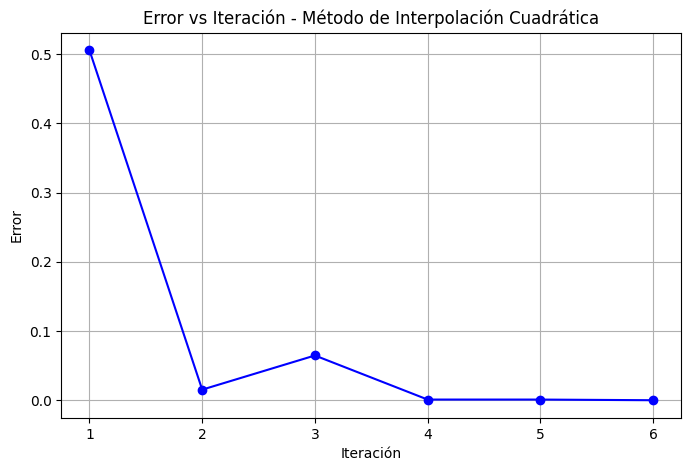

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fx = lambda x: 2 * np.sin(x) - (x**2 / 10)
x0 = 0
x1 = 1
x2 = 4
tolerancia = 0.00001
error = 1
iteracion = 0
tabla = []
errores = []

while error > tolerancia:
    iteracion += 1
    fx0 = fx(x0)
    fx1 = fx(x1)
    fx2 = fx(x2)
    x3 = ((fx0 * (x1**2 - x2**2) + fx1 * (x2**2 - x0**2) + fx2 * (x0**2 - x1**2)) /(2 * fx0 * (x1 - x2) + 2 * fx1 * (x2 - x0) + 2 * fx2 * (x0 - x1)))
    fx3 = fx(x3)
    error = abs(x1 - x3)
    if fx3 > fx1:
        if x3 > x1:
            x0 = x1
            x1 = x3
        else:
            x2 = x1
            x1 = x3
    else:
        if x3 > x1:
            x2 = x3
        else:
            x0 = x3
    errores.append(error)
    tabla.append([iteracion, x0, fx0, x1, fx1, x2, fx2, x3, fx3, error])

df = pd.DataFrame(tabla, columns=["Iteración", "x0", "f(x0)", "x1", "f(x1)", "x2", "f(x2)", "x3", "f(x3)", "Error"])
print(df.to_string(index=False))
print("-" * 100)
print(f"El máximo aproximado es: {fx3}")
print(f"Error final: {error}")
plt.figure(figsize=(8,5))
plt.plot(range(1, len(errores) + 1), errores, marker='o', linestyle='-', color='b')
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.title("Error vs Iteración - Método de Interpolación Cuadrática")
plt.grid(True)
plt.show()

# **5. Método de Newton**

 Iteración       xi         f(xi)    f'(xi)     xi+1        Error
         1 2.500000  5.719443e-01 -2.102287 2.772058 2.720581e-01
         2 2.772058 -4.606774e-02 -2.419403 2.753017 1.904096e-02
         3 2.753017 -1.693469e-04 -2.401503 2.752947 7.051703e-05
         4 2.752947 -2.381364e-09 -2.401435 2.752947 9.916423e-10
----------------------------------------------------------------------------------------------------
La raiz aproximada es: 2.7529466338187047
Error final: 9.916423238109928e-10


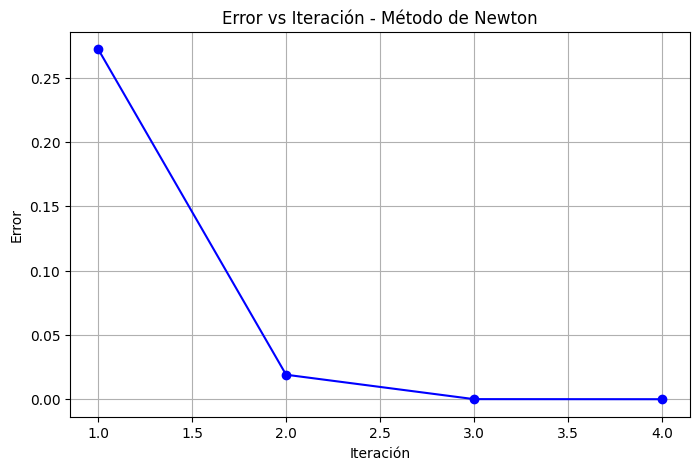

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

x = sp.Symbol('x')
fx = lambda x: 2 * sp.sin(x) - (x**2 / 10)
dfx = sp.diff(fx(x), x)

fx = sp.lambdify(x, fx(x), 'numpy')
dfx = sp.lambdify(x, dfx, 'numpy')

x0 = 2.5
error = 1
tolerancia = 0.00001
iteracion = 0

tabla = []
errores = []

while error > tolerancia:
    iteracion += 1
    fx0 = fx(x0)
    dfx0 = dfx(x0)
    x1 = x0 - (fx0 / dfx0)
    error = abs(x1 - x0)
    errores.append(error)
    tabla.append([iteracion, x0, fx0, dfx0, x1, error])
    x0 = x1

df = pd.DataFrame(tabla, columns=["Iteración", "xi", "f(xi)", "f'(xi)", "xi+1","Error"])
print(df.to_string(index=False))
print("-" * 100)
print(f"La raiz aproximada es: {x1}")
print(f"Error final: {error}")
plt.figure(figsize=(8,5))
plt.plot(range(1, len(errores) + 1), errores, marker='o', linestyle='-', color='b')
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.title("Error vs Iteración - Método de Newton")
plt.grid(True)
plt.show()


# **6. Método de Newton-Raphson**

 Iteración       xi    f(xi)        f'(xi)   f''(xi)     xi+1    Error
         1 2.500000 0.571944 -2.102287e+00 -1.396944 0.995082 2.000000
         2 0.995082 1.578588  8.898527e-01 -1.877607 1.469011 1.504918
         3 1.469011 1.773849 -9.058233e-02 -2.189649 1.427642 0.473929
         4 1.427642 1.775726 -1.973395e-04 -2.179542 1.427552 0.041368
         5 1.427552 1.775726 -1.169789e-09 -2.179516 1.427552 0.000091
----------------------------------------------------------------------------------------------------
El máximo aproximado de la funcion esta en x = 1.4275517787645942 y tiene el valor de 1.7757256531474153
Error final: 9.054171746347706e-05


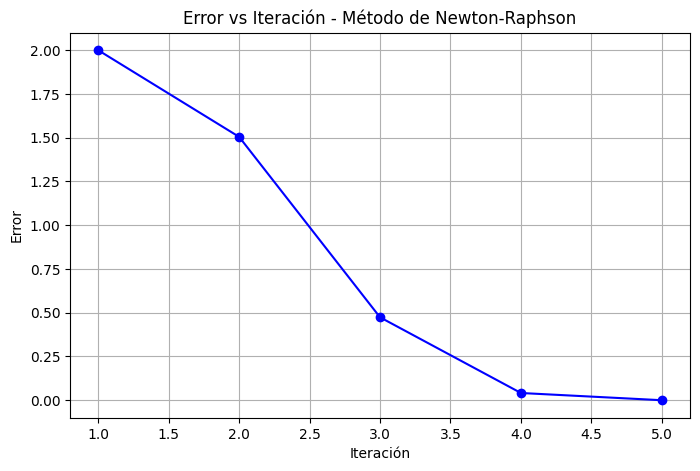

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

x = sp.Symbol('x')
fx = lambda x: 2 * sp.sin(x) - (x**2 / 10)

dfx = sp.diff(fx(x), x)
d2fx = sp.diff(dfx, x)
fx = sp.lambdify(x, fx(x), 'numpy')
dfx = sp.lambdify(x, dfx, 'numpy')
d2fx = sp.lambdify(x, d2fx, 'numpy')
x0 = 2.5
error = 2
tolerancia = 0.000001
iteracion = 0
tabla = []
errores = []
fl = 2
while  abs(fl)  > tolerancia:
    iteracion += 1
    fx0 = fx(x0)
    dfx0 = dfx(x0)
    d2fx0 = d2fx(x0)
    fl = abs(dfx0)
    x1 = x0 - (dfx0 / d2fx0)
    if iteracion > 1:
      error = abs(x0 - tabla[-1][1])
    errores.append(error)
    tabla.append([iteracion, x0, fx0, dfx0, d2fx0, x1, error])
    x0 = x1

df = pd.DataFrame(tabla, columns=["Iteración", "xi", "f(xi)", "f'(xi)", "f''(xi)", "xi+1", "Error"])
print(df.to_string(index=False))
print("-" * 100)
print(f"El máximo aproximado de la funcion esta en x = {x1} y tiene el valor de {fx0}")
print(f"Error final: {error}")
plt.figure(figsize=(8,5))
plt.plot(range(1, len(errores) + 1), errores, marker='o', linestyle='-', color='b')
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.title("Error vs Iteración - Método de Newton-Raphson")
plt.grid(True)
plt.show()

# **7. Método de búsqueda aleatoria**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x, y):
    return y - x - 2*x**2 - 2*x*y - y**2

x_min, x_max = -2, 2
y_min, y_max = 1, 3
num_iter = 1000
max_f = -np.inf
max_x, max_y = None, None
tabla = []

for i in range(1, num_iter + 1):
    x = x_min + (x_max - x_min) * np.random.rand()
    y = y_min + (y_max - y_min) * np.random.rand()
    f_val = f(x, y)

    if f_val > max_f:
        max_f = f_val
        max_x, max_y = x, y

    tabla.append([i, x, y, f_val, max_f])

df = pd.DataFrame(tabla, columns=["Iteración", "x", "y", "f(x, y)", "Máximo acumulado"])

print(df.head(100))
print(f"Máximo aproximado encontrado en f({max_x:.4f}, {max_y:.4f}) = {max_f:.4f}")





    Iteración         x         y   f(x, y)  Máximo acumulado
0           1 -0.869577  2.601816 -0.285423         -0.285423
1           2  0.766874  2.049538 -7.237606         -0.285423
2           3 -1.966019  1.419533 -0.778326         -0.285423
3           4  0.055497  2.604643 -4.530275         -0.285423
4           5  0.563113  1.884366 -4.985998         -0.285423
..        ...       ...       ...       ...               ...
95         96 -0.712379  1.072908  1.147822          1.199435
96         97  0.979913  1.947530 -8.562538          1.199435
97         98 -0.298654  2.525778 -2.224844          1.199435
98         99  0.530196  2.468661 -7.335783          1.199435
99        100  1.085030  1.247337 -6.454920          1.199435

[100 rows x 5 columns]
Máximo aproximado encontrado en f(-0.9574, 1.4349) = 1.2477
